# Analyzing test scores

A large school makes every student take year-end math, reading, and writing tests.

There is a demand:
* **to analyze** the score results
* **to prove** if test preparation courses are helpful
* **to explore** the effect of parental education level on test scores

**Project task:**

based on data:
* file **exams** that includes:
* "gender" - male / female
* "race/ethnicity" - one of 5 combinations of race/ethnicity
* "parent_education_level" - highest education level of either parent
* "lunch" - whether the student receives free/reduced or standard lunch
* "test_prep_course" - whether the student took the test preparation course
* "math" - exam score in math
* "reading" - exam score in reading
* "writing" - exam score in writing

**To create a report** to answer the principal's questions:

1. What are the average reading scores for students with/without the test preparation course?
2. What are the average scores for the different parental education levels?
3. What are the the effects within subgroups. Compare the average scores for students with/without the test preparation course for different parental education levels.
4. What are the principal wants to know if kids who perform well on one subject also score well on the others. Look at the correlations between scores.

**To summarize** the findings.

## Work space & data preparation 

In [1]:
# we upload the necessary libraries, set options
# and prepare the working space

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

In [2]:
# we upload, read the file (first 5 entries)
# & get general info

data = pd.read_csv('data/exams.csv')
display(data.head(5))
display(data.info())

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   gender                  1000 non-null   object
 1   race/ethnicity          1000 non-null   object
 2   parent_education_level  1000 non-null   object
 3   lunch                   1000 non-null   object
 4   test_prep_course        1000 non-null   object
 5   math                    1000 non-null   int64 
 6   reading                 1000 non-null   int64 
 7   writing                 1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


None

In [3]:
# we replace '|' by '_' in column name

data.columns = data.columns.str.replace("/", "_")
display(data.columns)

Index(['gender', 'race_ethnicity', 'parent_education_level', 'lunch',
       'test_prep_course', 'math', 'reading', 'writing'],
      dtype='object')

In [4]:
# we check duplicates

print('Number of duplicates = ', data.duplicated().sum())

Number of duplicates =  0


### Summary

* the table contains 1 000 entries and 8 columns
* all text entries are of expected lower register
* the column name *race/ethnicity* is replaced by *race_ethnicity*
* all entries are of expected data type
* no missing values are detected
* no duplicates are detected

## Exploratory data analysis

### Data overview

In [5]:
# we check data distribution in score columns

print(data[['math', 'reading', 'writing']].describe())

             math      reading      writing
count  1000.00000  1000.000000  1000.000000
mean     66.08900    69.169000    68.054000
std      15.16308    14.600192    15.195657
min       0.00000    17.000000    10.000000
25%      57.00000    59.000000    57.750000
50%      66.00000    70.000000    69.000000
75%      77.00000    79.000000    79.000000
max     100.00000   100.000000   100.000000


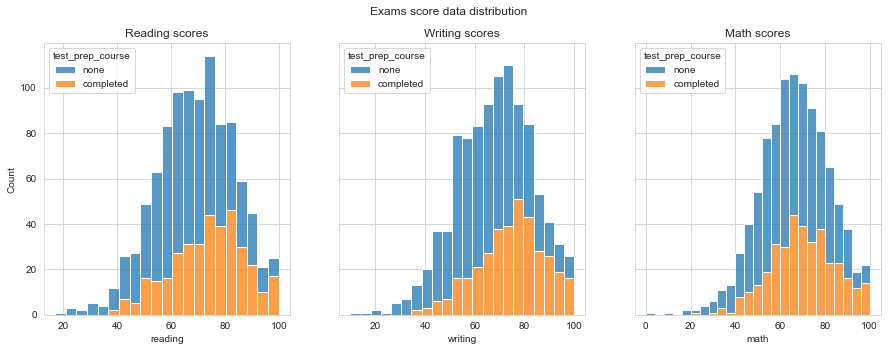

In [6]:
# we plot score data distribution
# we highlight test_prep_course groups

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Exams score data distribution')

# reading
sns.histplot(ax=axes[0], data=data, x="reading", hue="test_prep_course", multiple="stack")
axes[0].set_title('Reading scores')

# writing
sns.histplot(ax=axes[1], data=data, x="writing", hue="test_prep_course", multiple="stack")
axes[1].set_title('Writing scores')

# math
sns.histplot(ax=axes[2], data=data, x="math", hue="test_prep_course", multiple="stack")
axes[2].set_title('Math scores')

plt.show()

**Summary on data & graphics:**

* all 3 tests under study have **close to normal** data distribution
* *math* has the lowest **mean** value = 66.09, when *writing* = 68.05, *reading* = 69.17
* differences between **median & mean** values are small for all sets, **no outliers** in data
* **minimum** = 0 only for *math*, *writing* = 10, *reading* = 17
* in general students can **read better than write and calculate**
* **within the median** score range students who **did not take** the test preparation course **dominate** & take more than 50% share
* students who **took** the test preparation corse start dominating in groups with scores **over median**
* in *reading & writing* students who **took** the corse start with **minimum score = 36**
* ***math* test proves to be more complicated** - on top of minimum score starting with 0, we see that **minimum score** among students who took the corse starts with **20**

### Average scores for students with/without the test preparation course

In [7]:
# we calculate mean score values for students with/without the test preparation course

display(data.groupby('test_prep_course')[['reading', 'writing', 'math']].mean().round()) 

,reading,writing,math
test_prep_course,,,
completed,74.0,74.0,70.0
none,67.0,65.0,64.0


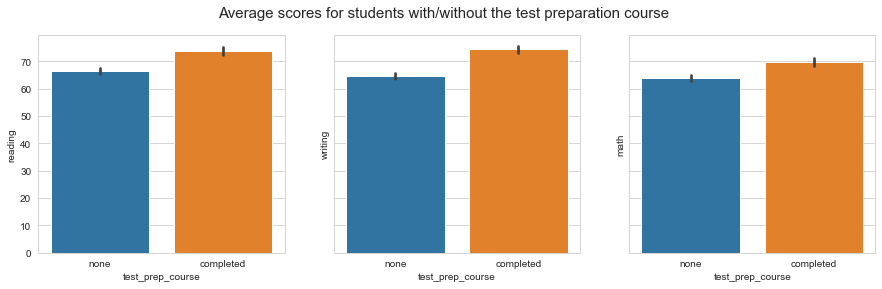

In [8]:
# We plot average score for students with/without the test preparation course

fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
fig.suptitle('Average scores for students with/without the test preparation course', fontsize=15)
sns.barplot(ax=axes[0], x='test_prep_course', y='reading', data=data)
sns.barplot(ax=axes[1], x='test_prep_course', y='writing', data=data)
sns.barplot(ax=axes[2], x='test_prep_course', y='math', data=data)
plt.show()

**Summary on graphics:**

* **prep** courses give vivid advantage in **average** scores (**completed vs none**):
>
> **reading** = 74 vs 67
>
> **writing** = 74 vs 65
>
> **math** = 70 vs 64

### Average scores for the different parental education levels

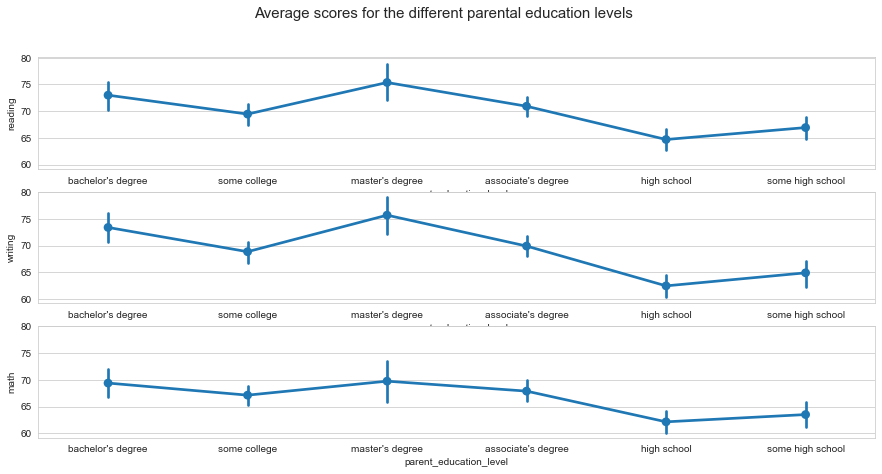

In [9]:
# We plot average scores for the different parental education levels

fig, axes = plt.subplots(3, 1, figsize=(15, 7), sharey=True)
fig.suptitle('Average scores for the different parental education levels', fontsize=15)
sns.pointplot(ax=axes[0], x='parent_education_level', y='reading', data=data)
sns.pointplot(ax=axes[1], x='parent_education_level', y='writing', data=data)
sns.pointplot(ax=axes[2], x='parent_education_level', y='math', data=data)
plt.show()

**Summary on graphics:**

* average scores for the different parental education levels shaped the rating:
>
> **1** place = 75 (reading) / 75 (writing) / 70 (math) = **masters' degree**
>
> **2** place = 74 (reading) / 74 (writing) / 70 (math) = **bachelors' degree**
>
> **3 / 4** place = 70 (reading) / 70 (writing) / 67 (math) = **some college / associate's degree**
>
> **5** place = 66 (reading) / 65 (writing) / 64 (math) = **some high school**
>
> **6** place = 65 (reading) / 64 (writing) / 63 (math) = **high school**
>

### Effects within subgroups - average scores for students with/without test preparation course for different parental education levels

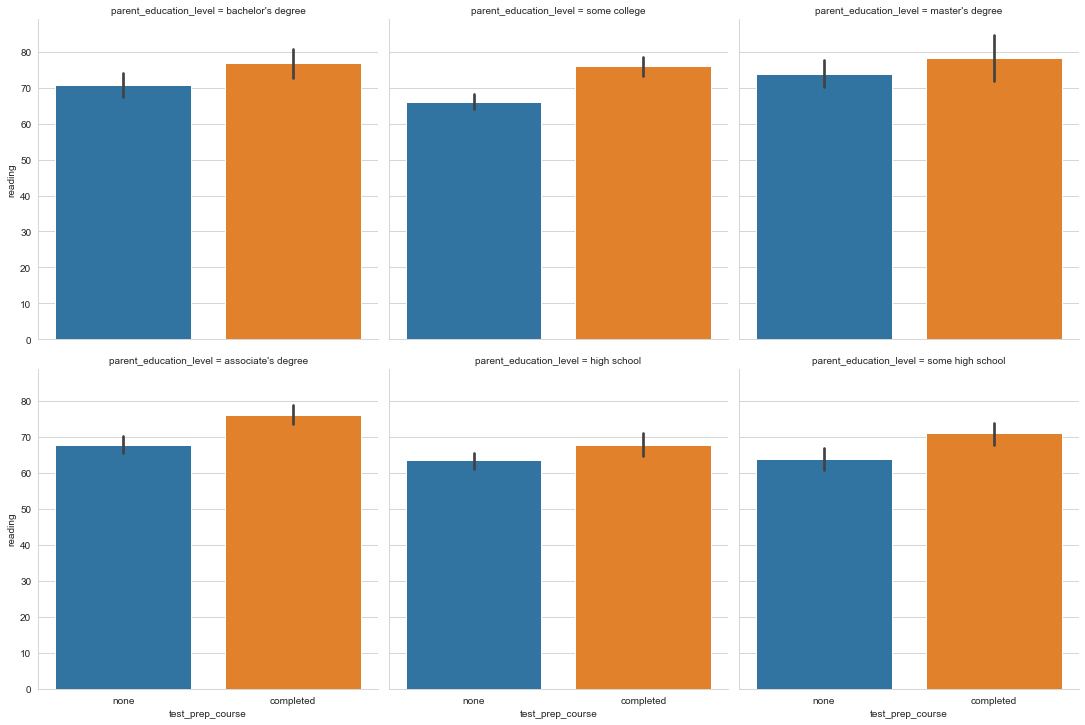

In [10]:
# we plot average scores for students with different parental education levels split by
# 'with / without test preparation course' for reading test

sns.catplot(x='test_prep_course', y='reading', col='parent_education_level', data=data, kind='bar', col_wrap=3)
plt.show()

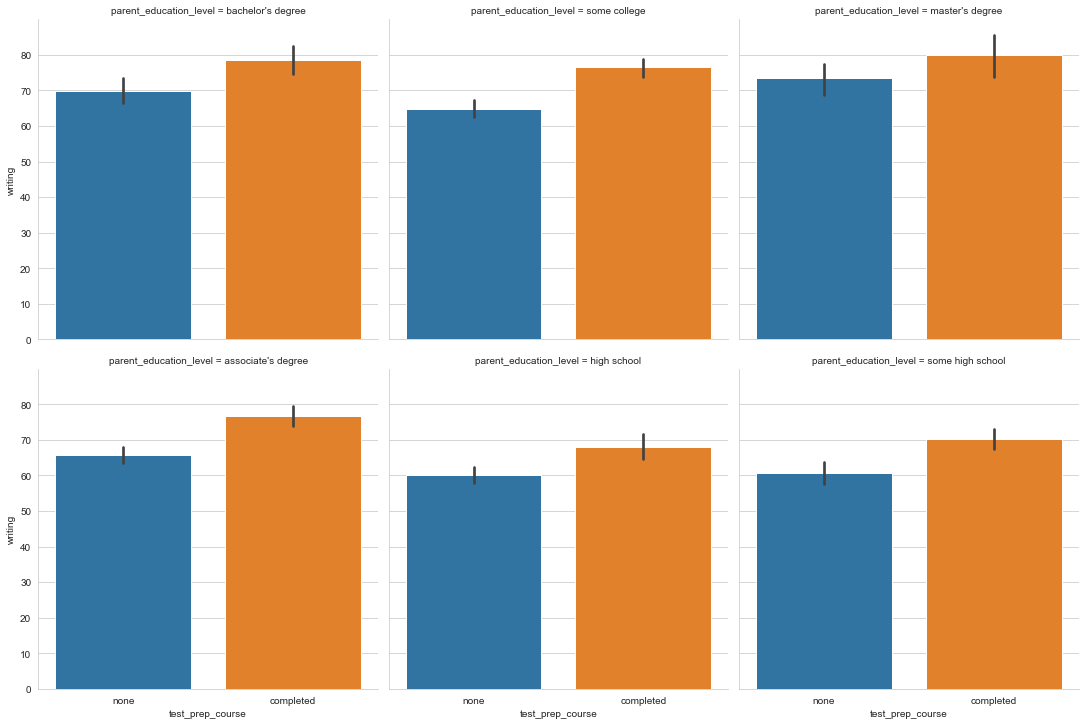

In [11]:
# we plot average scores for students with different parental education levels split by
# 'with / without test preparation course' for writing test

sns.catplot(x='test_prep_course', y='writing', col='parent_education_level', data=data, kind='bar', col_wrap=3)
plt.show()

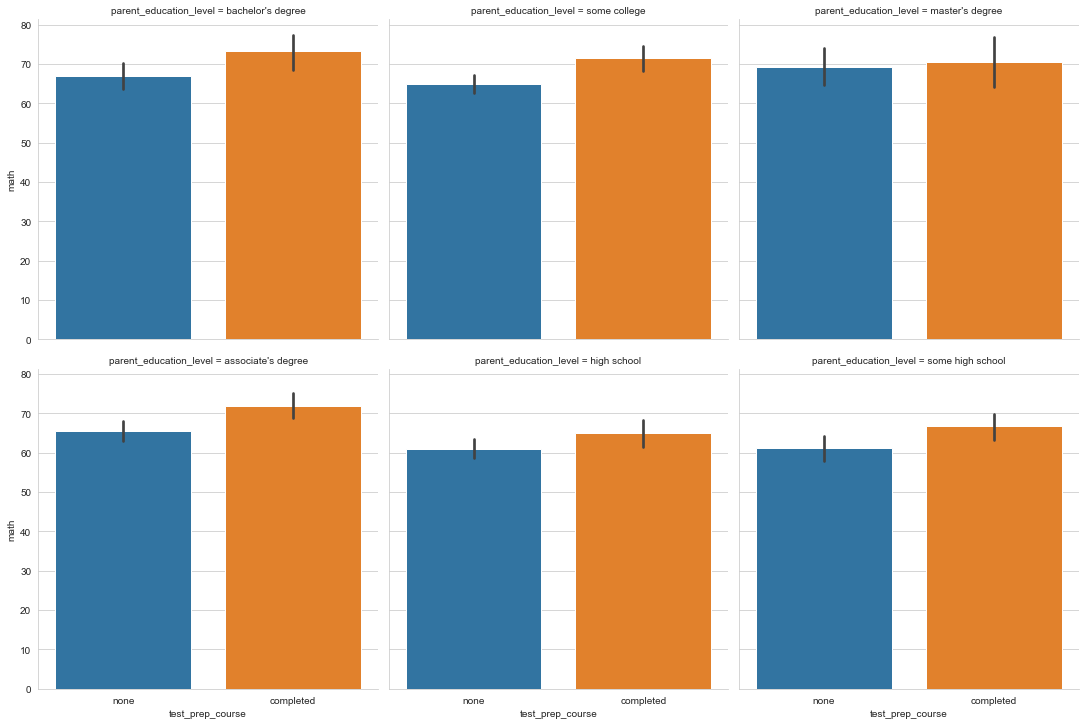

In [12]:
# we plot average scores for students with different parental education levels split by
# 'with / without test preparation course' for math test

sns.catplot(x='test_prep_course', y='math', col='parent_education_level', data=data, kind='bar', col_wrap=3)
plt.show()

**Summary on graphics:**

* in all parental education level groups for all tests students who completed test preparation course in average achieved higher scores than those who didn't

### Top scores group study

In [13]:
# we check correlation among score parameters

display(data.corr())

,math,reading,writing
math,1.000000,0.817580,0.802642
reading,0.817580,1.000000,0.954598
writing,0.802642,0.954598,1.000000


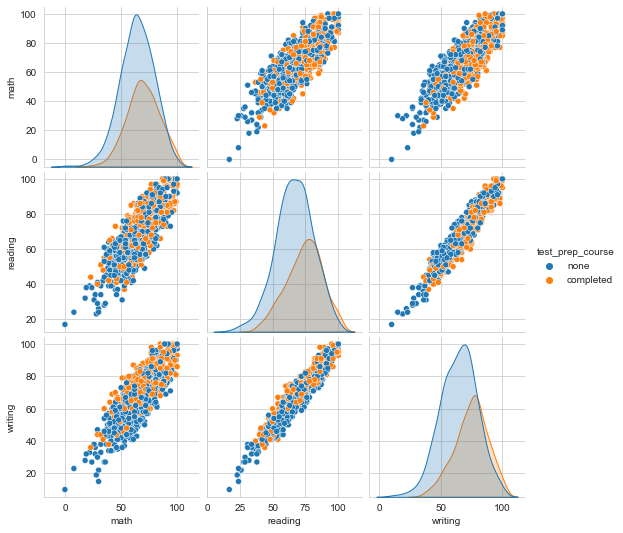

In [14]:
# we plot the correlation matrix

sns.pairplot(data, hue="test_prep_course")
plt.show()

**Summary on data & graphics:**
* correlation matrix proves strong positive correlation relationship among score parameters *reading, writing & math*
* if students achieve high scores, they achieve them in all 3 tests
* students who completed the preparation course have better shares in top results

In [15]:
# we create the sample with data on top scores students group,
# we check the stat data

data_top = data.query('reading > reading.median() and writing > writing.median() and math > math.median()')
print(data_top[['reading', 'writing', 'math']].describe())

          reading     writing        math
count  361.000000  361.000000  361.000000
mean    83.365651   82.556787   80.335180
std      7.568527    7.958414    8.545701
min     71.000000   70.000000   67.000000
25%     77.000000   76.000000   74.000000
50%     83.000000   82.000000   79.000000
75%     89.000000   88.000000   87.000000
max    100.000000  100.000000  100.000000


**Summary on data:**
* the group of **top** students who got **all test scores higher than median** encounts **361** student (36% of total)
* the top students got **average** scores:
>
> **reading** = 83.37
>
> **writing** = 82.56
>
> **math** = 80.34
>
* **75%** of the top students reached **scores up to**:
>
> **reading** = 89
>
> **writing** = 88
>
> **math** = 87
> 

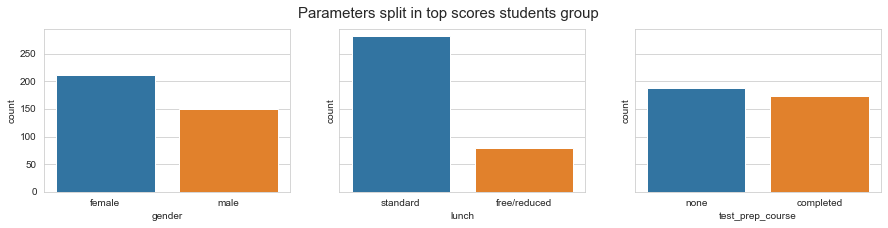

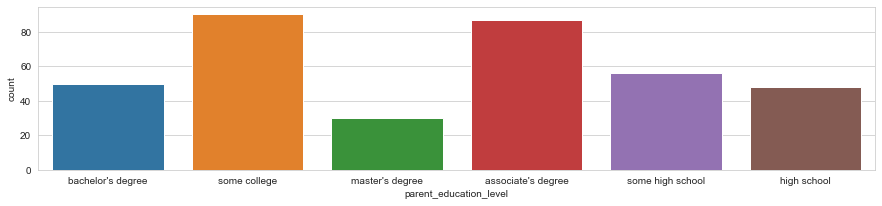

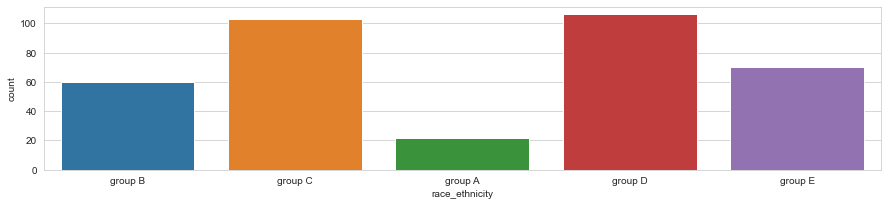

In [16]:
# we check the top group students' split among parameters

fig, axes = plt.subplots(1, 3, figsize=(15, 3), sharey=True)
fig.suptitle('Parameters split in top scores students group', fontsize=15)
sns.countplot(ax=axes[0], x="gender", data=data_top)
sns.countplot(ax=axes[1], x="lunch", data=data_top)
sns.countplot(ax=axes[2], x="test_prep_course", data=data_top)
plt.show()
ax = plt.subplots(figsize=(15, 3))
sns.countplot(x="parent_education_level", data=data_top)
plt.show()
ax = plt.subplots(figsize=(15, 3))
sns.countplot(x="race_ethnicity", data=data_top)
plt.show()

**Summary on graphics:**
* the top scores students group got features:
1. GENDER - **58.5%** of the group are girls
2. LUNCH - **76%** of the group take lunch
3. PREP COURSE - **51%** of the group did not complete the preparation course
4. PARENT EDUCATION - **some degree & associate's degree** are at the **top** & have the same **25%** shares; **master's degree** is at the **bottom** with **8%** share
5. RACE / ETHNICITY - **group D** is at the top with **30.5%** share, **group C** is the second with **28%** share, **group E** is the third with **19%** share

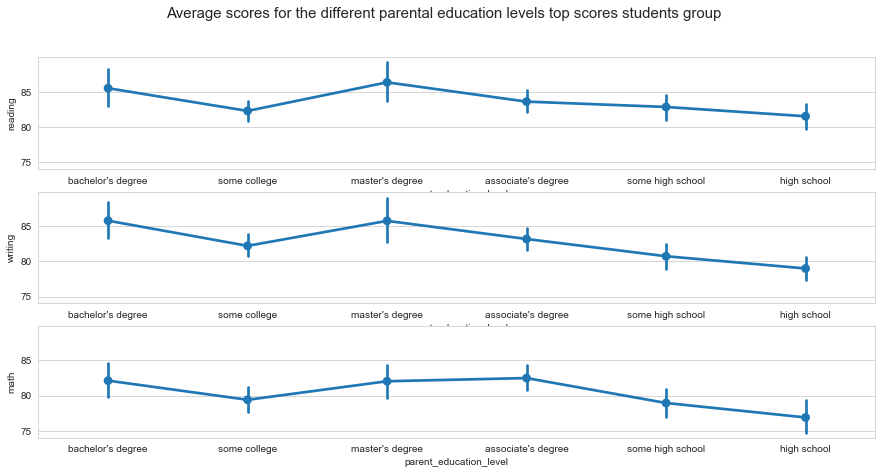

In [17]:
# We plot average scores for the different parental education levels
# in top scores students group

fig, axes = plt.subplots(3, 1, figsize=(15, 7), sharey=True)
fig.suptitle('Average scores for the different parental education levels top scores students group'\
             , fontsize=15)
sns.pointplot(ax=axes[0], x='parent_education_level', y='reading', data=data_top)
sns.pointplot(ax=axes[1], x='parent_education_level', y='writing', data=data_top)
sns.pointplot(ax=axes[2], x='parent_education_level', y='math', data=data_top)
plt.show()

**Summary on graphics:**

* average scores for the different parental education levels in top scores students group:
>
> **1** place = 87 (reading) / 86 (writing) / 83 (math) = **masters' degree**
>
> **2** place = 85 (reading) / 86 (writing) / 83 (math) = **bachelors' degree**
>
> **3** place = 84 (reading) / 84 (writing) / 83 (math) = **associate's degree**
>
> **4** place = 83 (reading) / 83 (writing) / 80 (math) = **some college**
>
> **5** place = 83 (reading) / 81 (writing) / 79 (math) = **some high school**
>
> **6** place = 82 (reading) / 79 (writing) / 77 (math) = **high school**
>

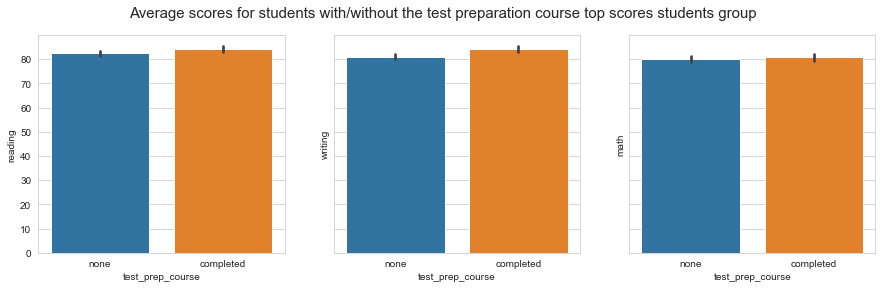

In [18]:
# We plot average score for students with/without the test preparation course

fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
fig.suptitle('Average scores for students with/without the test preparation course top scores students group'\
             , fontsize=15)
sns.barplot(ax=axes[0], x='test_prep_course', y='reading', data=data_top)
sns.barplot(ax=axes[1], x='test_prep_course', y='writing', data=data_top)
sns.barplot(ax=axes[2], x='test_prep_course', y='math', data=data_top)
plt.show()

**Summary on graphics:**
* in top scores students group the average results among students who took the prep course & who didn't do not have such evident difference
* **reading** - average of 'completed' is slightly better
* **writing** - average of 'completed' is slightly better
* **math** - averages are equal

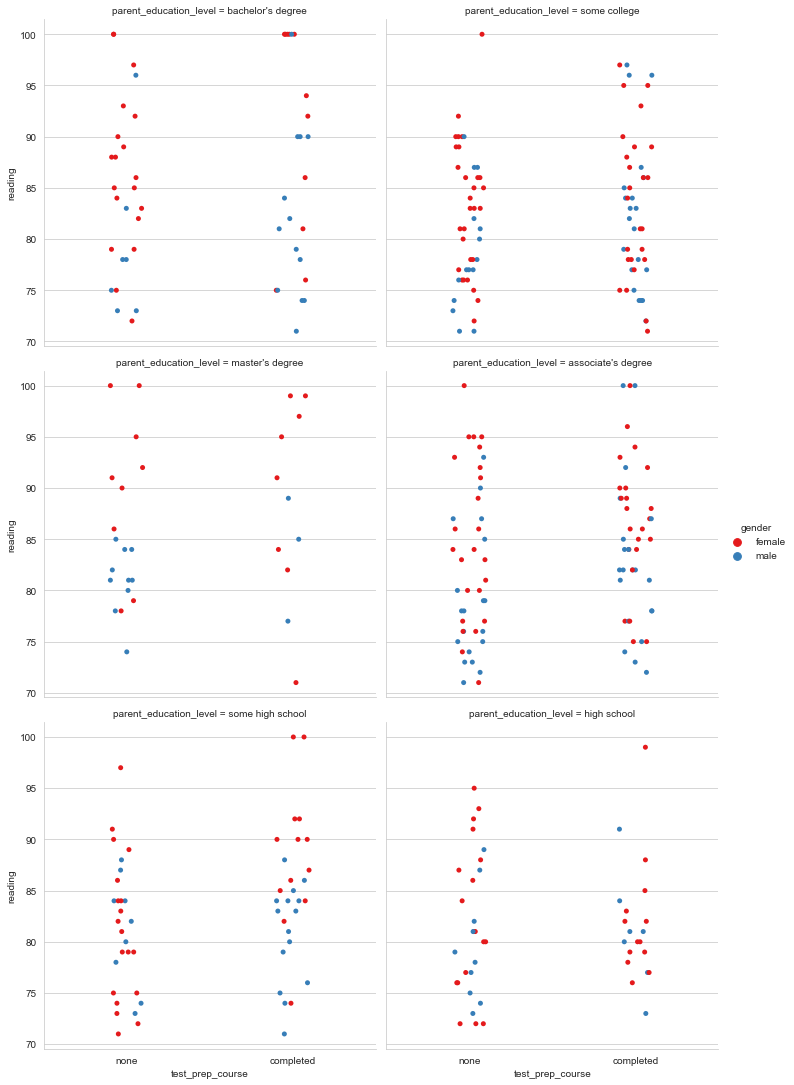

In [19]:
# we plot distribution of scores among female & male students,
# split by prep course complition & parent educational level
# READING test, top scores student group

sns.catplot(x="test_prep_course", y="reading", hue="gender", data=data_top, col='parent_education_level'\
           , col_wrap=2, palette="Set1")
plt.show()

**Summary on graphics READING:**
* **some college** most students perform between 75 & 90; prep / non prep have equal shares; above 90 performance is more on side of students who completed the prep course & mostly girls among them
* **associate's degree** - girls perform better; prep courses create higher dencity between 80 & 90, when non prep evenly stretch out between 70 & 85
* **some high school** - only girls have scores over 90; prep courses create higher dencity between 80 & 90, when non prep evenly stretch out between 70 & 85
* **bachelors' degree** - non prep group is bigger in number; both groups have altimate score 100, but number of students in prep group with this score is bigger
* **high school** - girls perform better; non prep group is bigger in number; there are more girls in prep group & there are more boys in non prep
* **masters' degree** - girls perform better; non prep group is bigger in number; altimate scores are in non prep group

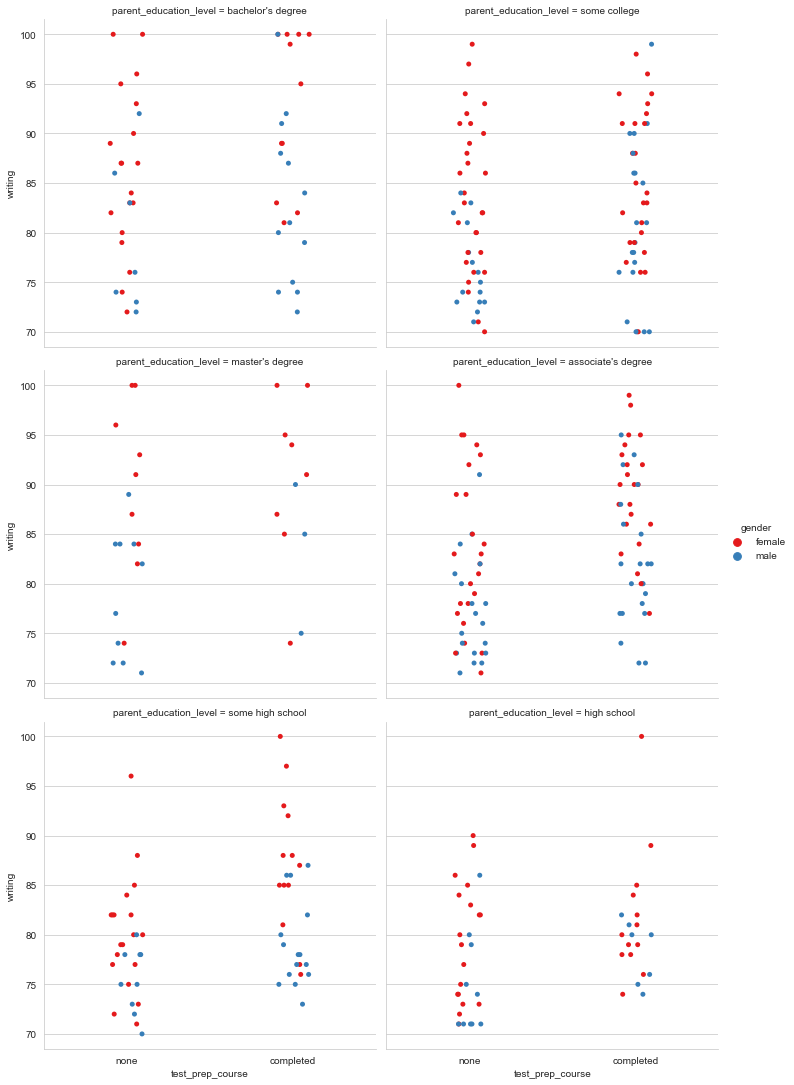

In [20]:
# we plot distribution of scores among female & male students,
# split by prep course complition & parent educational level
# WRITING test, top scores student group

sns.catplot(x="test_prep_course", y="writing", hue="gender", data=data_top, col='parent_education_level'\
           , col_wrap=2, palette="Set1")
plt.show()

**Summary on graphics WRITING:**
* **some college** most prep students perform between 75 & 85; in non prep group scores over 85 are achieved only by girls
* **associate's degree** - girls perform better; ultimate score is achieved by girl in the non prep group; boys dominate within the range 70 - 85 in both prep & non prep groups, girls within the range 85 - 100
* **some high school** - only girls have scores over 90; in non prep group boys perfofm between 70 & 80; in non group boys perfofm between 77 & 87
* **bachelors' degree** - there are ultimate scores in both groups, but girls are bigger in number; in non prep group girls start with 72, when in prep group with 82; prepgroup results look better
* **high school** - there is 1 ultimate score in prep group; non prep scores are within the range 71 - 90; prep scores are within the range 74 - 89
* **masters' degree** - boys dominate in number in non prep group - girls in prep; scores above 90 are achieved only by girls

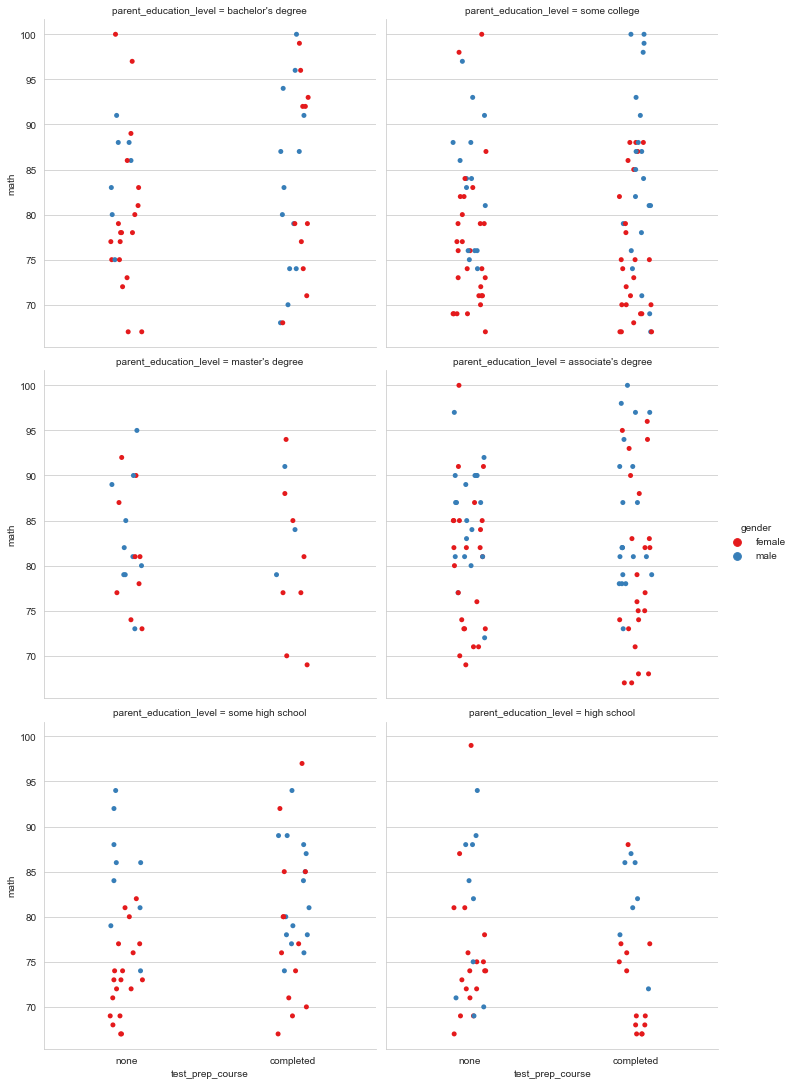

In [21]:
# we plot distribution of scores among female & male students,
# split by prep course complition & parent educational level
# MATH test, top scores student group

sns.catplot(x="test_prep_course", y="math", hue="gender", data=data_top, col='parent_education_level'\
           , col_wrap=2, palette="Set1")
plt.show()

**Summary on graphics MATH:**
* **some college** boys achieve higher scores; there are ultimate results in both prep & non prep groups
* **associate's degree** - boys achieve higher scores; there are ultimate results in both prep & non prep groups; number of achievements over 90 is higher in prep group
* **some high school** - boys achieve higher scores; top scores are within the range 85 - 95
* **bachelors' degree** - there are ultimate achievements in both prep & non prep groups; number if students who got scores over 90 is bigger in prep group; share of girls is higher in non prep group
* **high school** - non prep group has higher scores; boys perform better in both groups
* **masters' degree** - girls dominate in prep group; top scores are within the range 85 - 95

## Report summary

1. General **score results**:
* the scores proved that students **can read better than write & calculate**
* the **MATH** test showed the lowerest level of minimum, average & maximum scores
* **ALL TESTS 25%** of the students got scores up to **57 - 59**
* **ALL TESTS 50%** of the students got scores up to **66 - 70**
* **ALL TESTS 75%** of the students got scores up to **77 - 79**
* **ultimate** score of 100 was achieved in **every test**

2. Effectiveness of the **preparation course**:
* in **everage** students who took the preparation course performed **better**
* **minimum and mean scores** for all tests are **higher** among those who **completed**
* in groups with scores **over median** those students who **completed** the course make the **majority**

3. Effect of **parental education** level:
* the results of the data analysis allow to make the conclusion that **parental education level** may **have some impact on students test scores**
* in average & in TOP performance groups trends have similar patterns
* students who's parents got **masters degree** have **highest** average scores
* **bachelor's & associate's degrees** go on the **second** place
* **some college** go **third**
* **some high school** group shows better results than **high school** in average
* **high school** overtake the **some high school** group in TOP performance segment

4. Insights from the **TOP scores** group study:
* there is strong positive correlation among score results in tests - **if students achieve high scores, they achieve them in all 3 tests**
* the **profile** of the student from the **TOP score** students group:
>
> "More often a girl (58.5%), probably taking the preparation course (51%), most probably taking lunch (76%), whose parents perhaps got some or associate's degree (25% + 25%), belonging to D or C race/ethnicity groups (30.5% = 28%)"
>
* for students in TOP performance group differences in mean scores among those who took the preparation corse and didn't are smaller than in average
* for the **MATH** test there is **no difference** at all
* **girls** perfom better in **READING & WRITING**
* **boys** perform better in **MATH**
* students who **completed** the **preparation** course achieve the **ultimate** score more often
* **masters' degree** is the sub group where the share of students who took the preparation course is the smallest comparing to other parents education levels

## The dashboard is available

https://public.tableau.com/app/profile/victoria8304/viz/DataCampTestResultsAnalysiscomp/Dashboard1#1